 # Mental Health in Tech Workplace 

 
Dataset from Kaggle: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data



Columns and Descriptions

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

# Initial Data Cleaning

- Run this Section of Code for all the EDA and cleaning concatenated into a convenient block, then skip the data cleaning section of EDA and head straight to Splitting and Modeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve

In [4]:
df = pd.read_csv('/Users/christineyao/Downloads/survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [388]:
#Initial Shape
df.shape

(1259, 27)

In [450]:
#all the code in one
#Run this before splitting and modeling
df = pd.read_csv('/Users/christineyao/Downloads/survey.csv')


df = df.drop(['comments'], axis= 1)
df = df.drop(['state'], axis= 1)
df = df.drop(['Timestamp'], axis= 1)
df.columns


#Gender cleaning
df["Gender"].replace(['array of values and mispellings'], 'replaced value', inplace = True)
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                     'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)
df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)
df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                      'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means', 
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)


df.loc[df.Age> 80, ["Age"]] = df["Age"].median()
df.loc[df.Age< 18, ["Age"]] = df["Age"].median()

#Create new category for the people who don't have mental illness and cannot answer the question
#work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
df['work_interfere'] = df['work_interfere'].fillna('Not Applicable')

#Impute the self_employed 
df['self_employed'].fillna('No', inplace = True)


/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_15382/3425203063.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_15382/3425203063.py:35: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [451]:
print(df.isnull().sum())  # Counts missing values per column


Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


In [423]:
df['self_employed'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1254     No
1255     No
1256     No
1257     No
1258     No
Name: self_employed, Length: 1259, dtype: object>

In [407]:
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

In [392]:
df['work_interfere'].value_counts()

work_interfere
Sometimes         465
Not Applicable    264
Never             213
Rarely            173
Often             144
Name: count, dtype: int64

In [452]:
#last check to see no missing values

print(df.isnull().sum())  # Counts missing values per column
df['self_employed'].value_counts()


Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


self_employed
No     1113
Yes     146
Name: count, dtype: int64

# I. Exploratory Data Analysis 

In [397]:
#rows and columns
df.shape

(1259, 24)

In [537]:
# List of the features you're interested in
features = ['Gender', 'Country', 'self_employed', 'family_history', 'remote_work', 
            'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help',
            'anonymity', 'mental_health_consequence', 'phys_health_consequence',
            'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
            'mental_vs_physical', 'obs_consequence', 'work_interfere', 'no_employees', 'leave']

# Create a dictionary to store unique values for each feature
unique_values = {feature: df[feature].unique() for feature in features}

# Print the unique values for each feature
for feature, values in unique_values.items():
    print(f"Unique values for '{feature}':\n{values}\n")


Unique values for 'Gender':
['Female' 'Male' 'Other']

Unique values for 'Country':
['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines']

Unique values for 'self_employed':
['No' 'Yes']

Unique values for 'family_history':
['No' 'Yes']

Unique values for 'remote_work':
['No' 'Yes']

Unique values for 'tech_company':
['Yes' 'No']

Unique values for 'benefits':
['Yes' "Don't know" 'No']

Unique values for 'care_options':
['Not sure' 'No' 'Yes']

Unique values for 'wellness_program':
['No' "Don't know" 'Yes']

- We have a total of 1259 rows and 27 columns in the data set

In [398]:
df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [399]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

### Categorical, Ordinal and Continuous Features


- Ordinal/Categorical features
    - work_interfere
    - no_employees
    - leave
    - coworkers

- Categorical Yes/No/Maybe
    - Family History
    - Treatment
    - Mental Health Consequence
    - Physical Health Consequence
    - Supervisor
    - Mental Health Interview
    - Physical Health Interview
    - Mental vs. Physical
    - Obs Consequence

- Numerical Discreet Features
    - Age

In [400]:
#datatypes of all the columns
df.dtypes

Age                           int64
Gender                       object
Country                      object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

In [547]:
df.isnull().sum() 

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

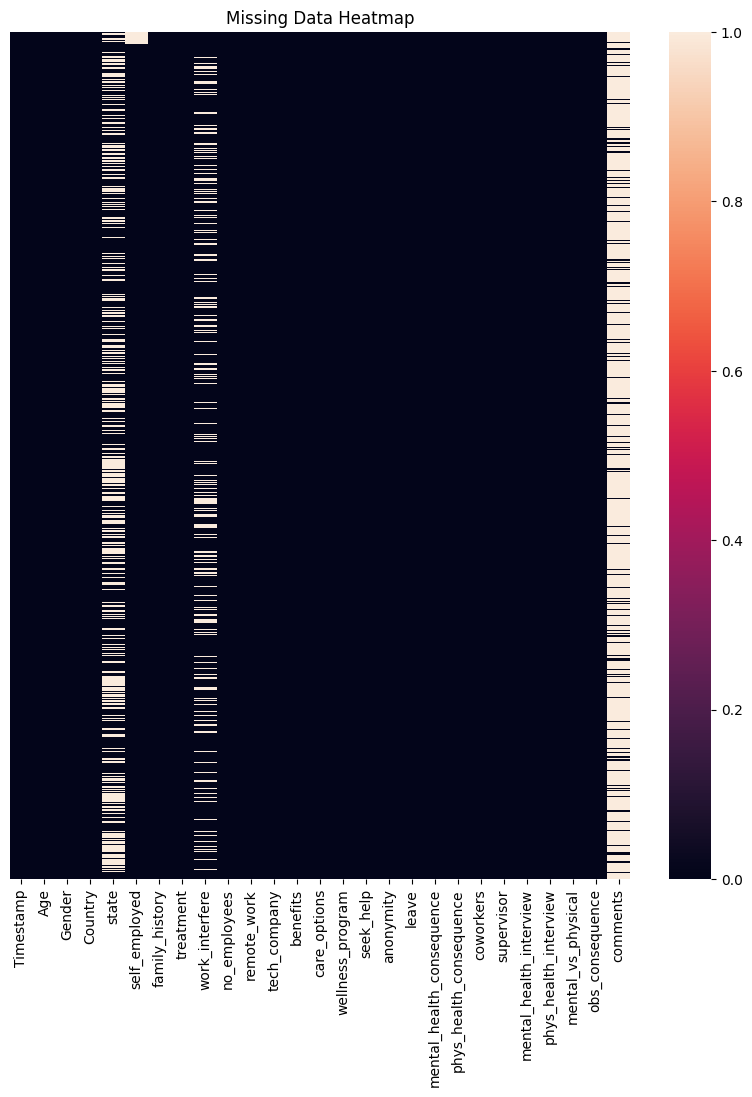

In [558]:
# Plot heatmap
plt.figure(figsize=(10, 11))
sns.heatmap(df.isnull(), yticklabels=False)
plt.title('Missing Data Heatmap')
plt.savefig('Missing_data_heatmap.png', dpi = 500)
plt.show()

In [ ]:
print("fraction of points in State with missing values: ", (df['state'].isnull().sum())/df.shape[0])
print("fraction of points in self_employed with missing values: ", (df['self_employed'].isnull().sum())/df.shape[0])
print("fraction of points in work_interfere with missing values: ", (df['work_interfere'].isnull().sum())/df.shape[0])
print("fraction of points in comments with missing values: ", (df['comments'].isnull().sum())/df.shape[0])

In [306]:

self_employed_percent = (df["self_employed"].isnull().sum()/len(df["self_employed"]))*100
work_interfere_percent = (df["work_interfere"].isnull().sum()/len(df["work_interfere"]))*100

print(f"The percentage of missing values in self_employed column is {round(self_employed_percent, 2)}%")
print(f"The percentage of missing values in work_interfere column is {round(work_interfere_percent, 2)}%")

The percentage of missing values in self_employed column is 1.43%
The percentage of missing values in work_interfere column is 20.97%


In [410]:
#Checking to see what values are nan in work interfere and self employed
df['self_employed'].unique() #[nan, 'Yes', 'No']
df['work_interfere'].unique() #['Often', 'Rarely', 'Never', 'Sometimes', nan]

array(['Often', 'Rarely', 'Never', 'Sometimes', 'Not Applicable'],
      dtype=object)

There are a lot of null values in state, which makes sense since not all countries in the country category is the United States. However, a majority of the values from the survey come from the United States. Many missing values in comments, which is hard to analyze so I might drop this colummn. There are alkso missing values in slef employed and work_interfere

Dropping Unecessary Columns

| Variable Name|  Reason                                                                           |
|:------------:|:---------------------------------------------------------------------------------:|
|  Timestamp   |  All responses are from some time in 2014                                         |
|  state       |  Too many null values (non_US) in State                                           |
|  comments    |  Not really necessary for predicting the target variable, and is too complicated  |

In [100]:
#dropping unecessary columns 
df = df.drop(['comments'], axis= 1)
df = df.drop(['state'], axis= 1)
df = df.drop(['Timestamp'], axis= 1)
df.columns

#drop rows in self employed since there is only 1.5% missing values
df = df.dropna(subset=['self_employed'])

In [ ]:
df.shape

In [101]:
# Replace NaN values with a new category
df['work_interfere'] = df['work_interfere'].fillna('Unknown')

The new dataframe has 1251 rows and 24 columns

In [526]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', 'Not Applicable'],
      dtype=object)

In [528]:
df.value_counts().unique()

Age  Gender  Country         self_employed  family_history  treatment  work_interfere  no_employees    remote_work  tech_company  benefits    care_options  wellness_program  seek_help   anonymity   leave               mental_health_consequence  phys_health_consequence  coworkers     supervisor    mental_health_interview  phys_health_interview  mental_vs_physical  obs_consequence
35   Male    Denmark         Yes            Yes             Yes        Often           1-5             No           Yes           No          Yes           Yes               No          Don't know  Somewhat easy       No                         No                       Some of them  Some of them  Maybe                    Yes                    Yes                 No                 2
28   Male    Netherlands     No             No              No         Not Applicable  6-25            No           Yes           No          Not sure      No                No          Don't know  Somewhat easy       Maybe        

### gender analysis

In [ ]:
print(df['Gender'].describe())

In [ ]:
df['Gender'].unique() #these are all the unique features in the gender column.

Sort them into either 
- Male, or cis-male. This is someone who was born as a male and indentifies that way
- Female or cis-female. This is someone who was born as female and identifies that way
- Other, gender queer, fluid, androgynous, non-binary, trans categories

In [ ]:
df["Gender"].replace(['array of values and mispellings'], 'replaced value', inplace = True)

df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                     'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                      'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means', 
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

In [ ]:
df['Gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Number of Employees", labelpad=12)
plt.title("Count of Employees by Gender", y=1.02, fontsize=16);
#plt.savefig('Gendercount.png')
plt.show()


### age analysis

In [ ]:
#cleaning the age column
df['Age'].unique()

In [ ]:
df.loc[df.Age> 80, ["Age"]] = df["Age"].median()
df.loc[df.Age< 18, ["Age"]] = df["Age"].median()

df['Age'].unique()

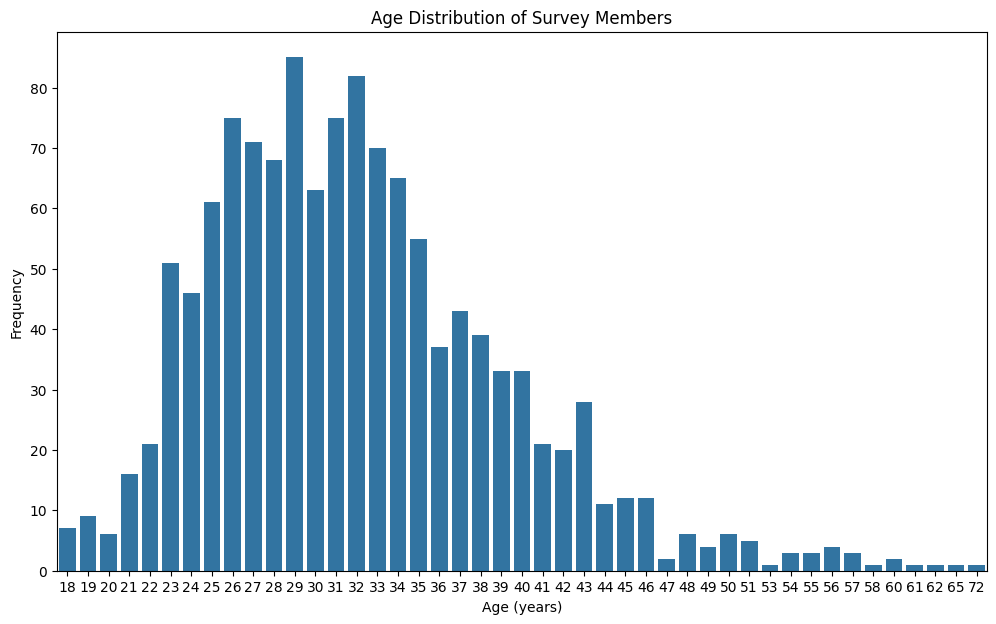

In [487]:
import seaborn as sns
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Distribution of Survey Members')
plt.savefig('age_distribution_barplot.png',dpi = 500)
plt.show()

There are a wide range of ages, but it's safe to say that we can assume those that are in the workforce are above age 18 and less than around 80 years old. We can assume that the people who submitted age outliers probably just put in a random number because they feel like exposing their real ages 

Most workers are around 25-40 age range with a tail towards 50 and 60.

### location analysis

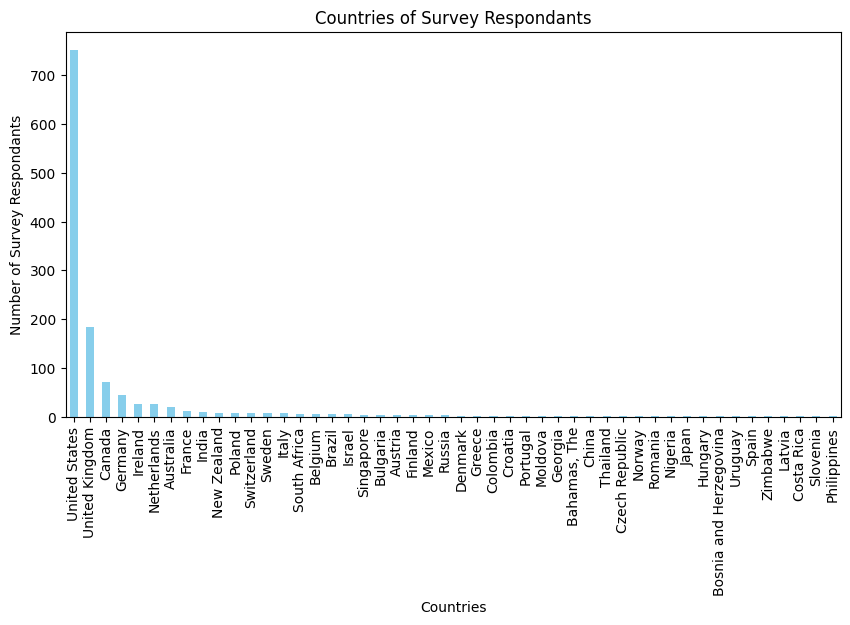

Number of countries
48


In [488]:
#Respondants in different countries
# separate Country column by unique values and bin everything
grouped_data = df['Country'].value_counts()
#histogram is for numerical values, and bar plot is for categorical

# Create a bar chart
plt.figure(figsize=(10, 5))  # Adjust the width (12) as needed
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Countries of Survey Respondants')
plt.xlabel('Countries')
plt.ylabel('Number of Survey Respondants')
plt.savefig('location_analysis.png', dpi = 500)
plt.show()
print('Number of countries')
print(grouped_data.size)

In [412]:
df['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [349]:
#gender is male, female or other
#Mental health consequence

mental_gender = df.groupby('Gender')['mental_health_consequence'].value_counts(normalize = True).mul(100).round(2).unstack()

mental_gender

mental_health_consequence,Maybe,No,Yes
Gender,,,
Female,43.72,29.55,26.72
Male,36.73,41.68,21.59
Other,23.81,19.05,57.14


In [490]:
import plotly.express as px
import plotly.graph_objects as go
for i in ['Male', 'Female', 'Other']:
    t = df[df['Gender']==i].copy()
    fig = px.histogram(t, x='Age',nbins=40,color='treatment')
    fig.update_layout(
    title=i)
    fig.show()

Larger percentage of females with mental health issues seek treatment than males. 

In [351]:
df['work_interfere'].describe()

count          1259
unique            5
top       Sometimes
freq            465
Name: work_interfere, dtype: object

care_options
No          501
Yes         444
Not sure    314
Name: count, dtype: int64


/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_15382/3118150469.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




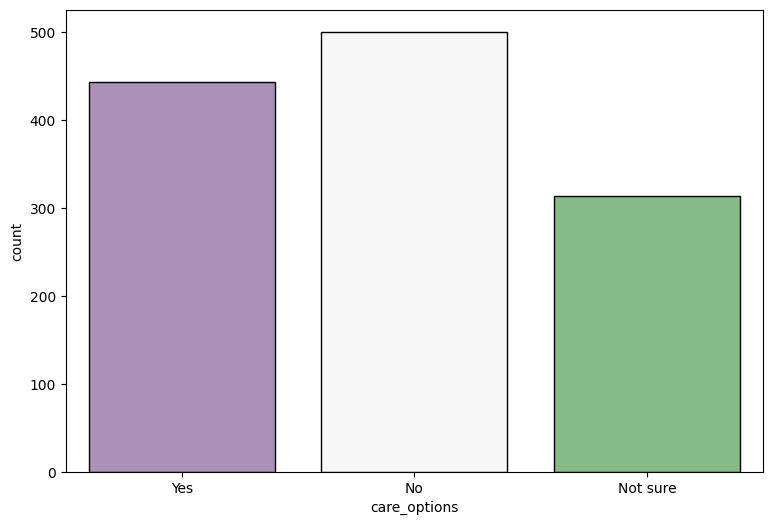

In [492]:
# How many employee know the options for mental health care their employer provides?
desired_orders = ('Yes', 'No', 'Not sure')
print(df["care_options"].value_counts())
plt.figure(figsize=(9,6))

sns.countplot(x="care_options",data=df,edgecolor="black",palette='PRGn', order = desired_orders);
plt.savefig('care_options.png', dpi = 500)

seek_help
No            646
Don't know    363
Yes           250
Name: count, dtype: int64


/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_15382/76508348.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




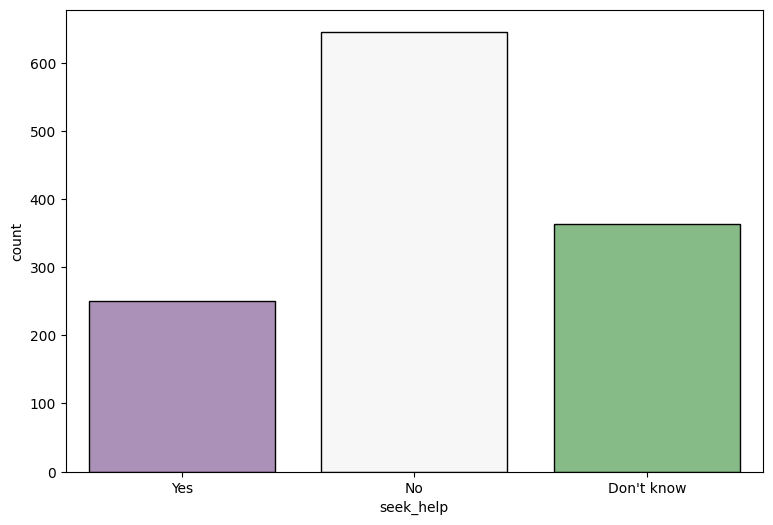

In [493]:
# Does any employer provide resources to learn more about mental health issues and how to seek help
desired_order = ["Yes", "No", "Don't know"]
print(df["seek_help"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="seek_help",data=df,edgecolor="black",palette='PRGn', order = desired_order);
plt.savefig('seek_help_bar.png', dpi = 500)

>700 employers do not provide resources or are not clear with the resources to the employees

benefits
Yes           477
Don't know    408
No            374
Name: count, dtype: int64


/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_15382/62457326.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




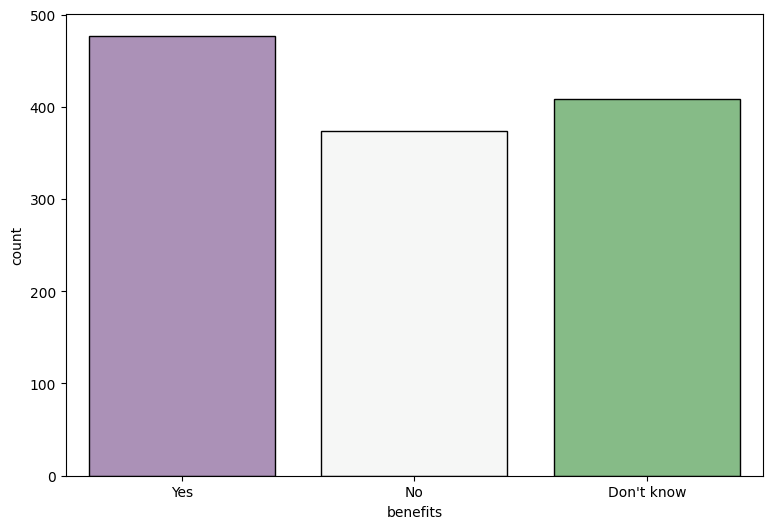

In [494]:
#does your company provide mental health benefits?
print(df["benefits"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="benefits",data=df,edgecolor="black",palette='PRGn', order = desired_order);
plt.savefig('benefits.png', dpi = 500)

wellness_program
No            842
Yes           229
Don't know    188
Name: count, dtype: int64


/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_15382/415061511.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




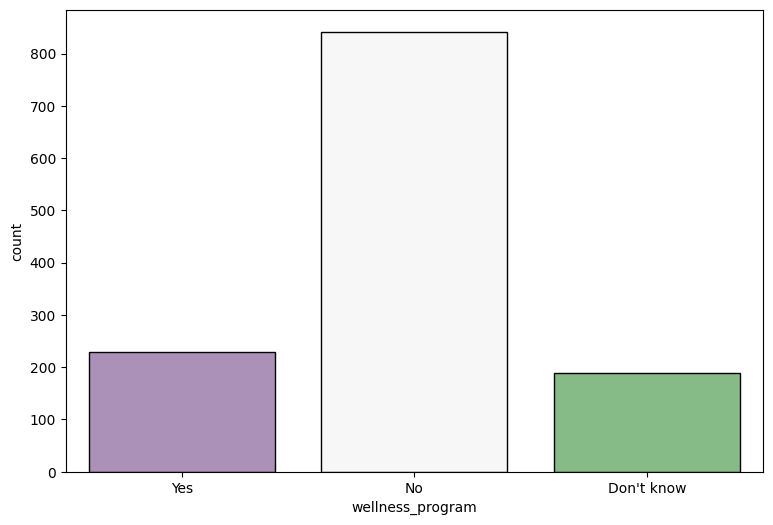

In [495]:
#wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
print(df["wellness_program"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="wellness_program",data=df,edgecolor="black",palette='PRGn', order = desired_order);
plt.savefig('wellnessprogram.png', dpi = 500)

Now I'm interested in seeing if there is a correlation between not knowing about wellness programs at work to treatment , number of employees. Are larger companies more likely to offer mental health benefits and options? Is there a correlation between perceieved negative consequence and No answers for the top three features?

- Relationship between Importance of Mental Health (mental_vs_physical) and Leave¶


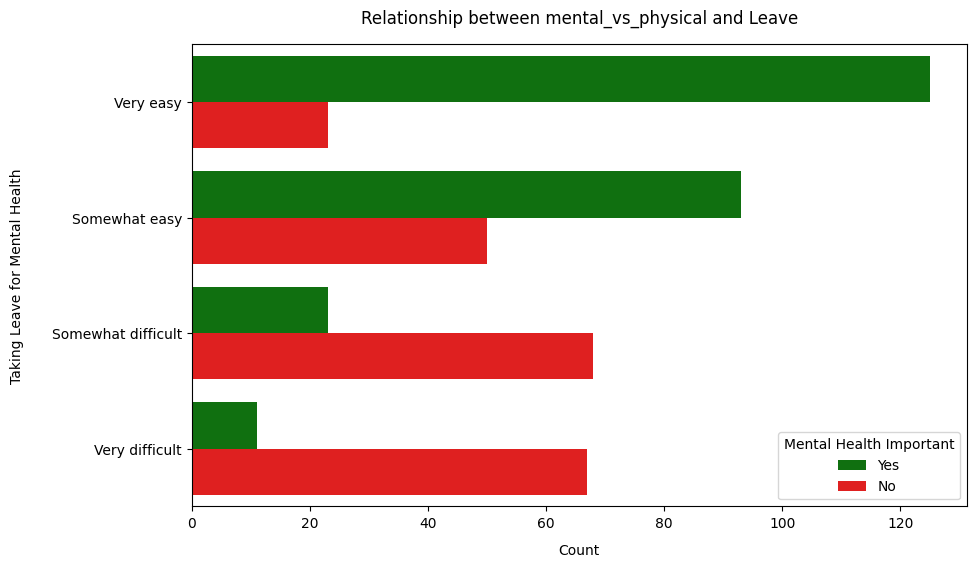

In [496]:
plt.figure(figsize=(10,6)) # Size of the figure
mvp = df[((df['mental_vs_physical'] == 'Yes') | (df['mental_vs_physical'] == 'No')) & (df['leave'] != "Don't know")]['leave']
test = df[((df['mental_vs_physical'] == 'Yes') | (df['mental_vs_physical'] == 'No')) & (df['leave'] != "Don't know")]['mental_vs_physical']

order = df[((df['mental_vs_physical'] == 'Yes') | (df['mental_vs_physical'] == 'No')) & (df['leave'] != "Don't know")]['leave'].value_counts().index 
sns.countplot(y=mvp, data=df, order=order, hue=test, palette=['green', 'red'])

plt.xlabel('Count', labelpad=10)
plt.ylabel('Taking Leave for Mental Health', labelpad=20)
plt.title('Relationship between mental_vs_physical and Leave', pad=15)

leg = plt.legend(loc='best', title='Mental Health Important')
leg._legend_box.align = "center"

plt.savefig('mentalphysical_leave.png', dpi=500)


/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_15382/714697420.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




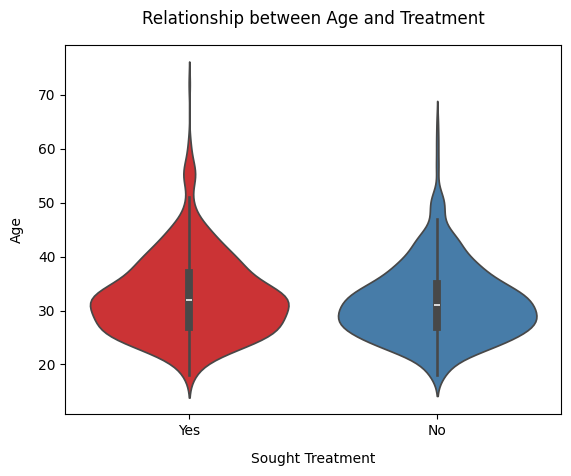

In [497]:
#Relationship between Age and Treatment
sns.violinplot(x='treatment', y='Age', data=df, palette='Set1')
plt.title('Relationship between Age and Treatment', pad=15);
plt.xlabel('Sought Treatment', labelpad=10)
plt.ylabel('Age', labelpad=10)
plt.savefig('age_vs_treatment.png', dpi=500)

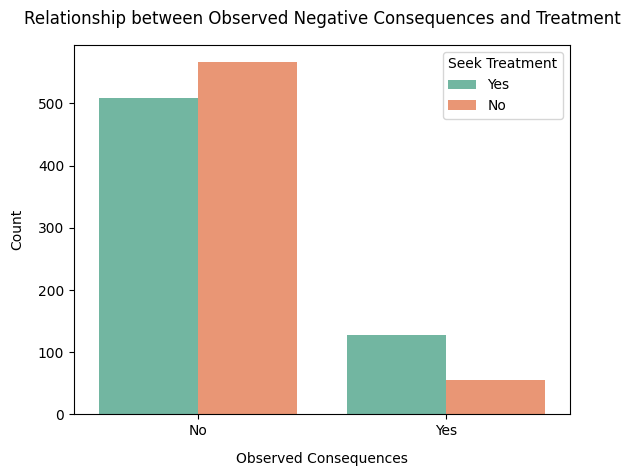

In [498]:
#Relationship between Anonymity and Treatment¶
sns.countplot( x = 'obs_consequence', hue = 'treatment', data = df, palette = 'Set2')
leg = plt.legend(loc='best', title='Seek Treatment')
leg._legend_box.align = "left"
plt.xlabel('Observed Consequences', labelpad=10)
plt.ylabel('Count', labelpad=10);
plt.title('Relationship between Observed Negative Consequences and Treatment', pad=15)
plt.savefig('obs_negconsequence_treatment.png', dpi = 500)


Unfortunately, a lot of people have observed negative consequences for their mental health.  Even so, there are also many who have placed a greater importance on their health, and seeked treatment for their mental health conditions.

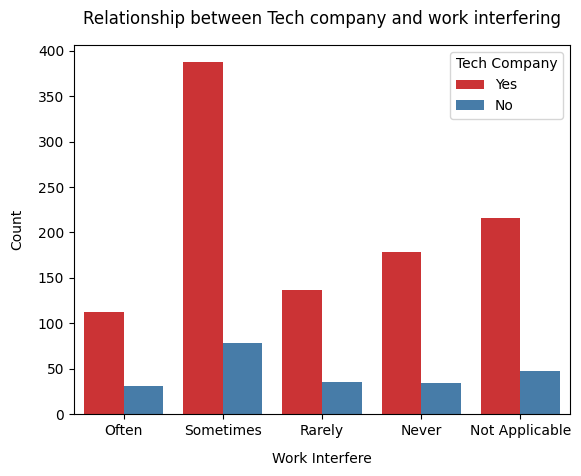

In [499]:
#Relationship between tech company and work interfere
#tech company (yes = works at a tech company, no = does not work at a tech company)
#work_interfere:  if you have a mental health condition does it interfere with your work

order = ['Often','Sometimes','Rarely','Never', 'Not Applicable']
sns.countplot( x = 'work_interfere', hue = 'tech_company', data = df, palette = 'Set1', order = order)
leg = plt.legend(loc='best', title='Tech Company')
leg._legend_box.align = "left"
plt.xlabel('Work Interfere', labelpad=10)
plt.ylabel('Count', labelpad=10);
plt.title('Relationship between Tech company and work interfering', pad=15)
plt.savefig('techcompany_workinterfere.png', dpi=500)


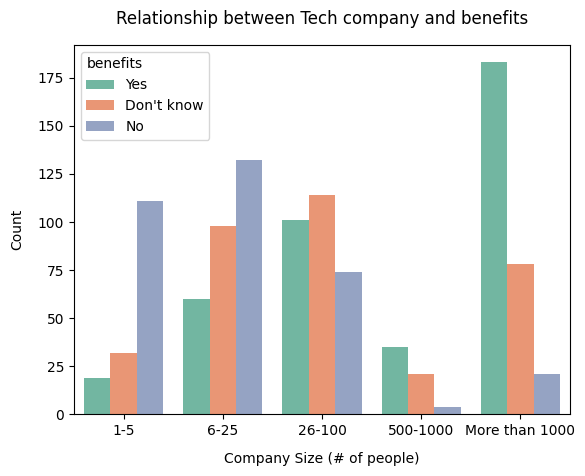

In [500]:
order = ['1-5','6-25','26-100','500-1000','More than 1000']
sns.countplot( x = 'no_employees', hue = 'benefits', data = df, palette = 'Set2', order = order)
leg = plt.legend(loc='best', title='benefits')
leg._legend_box.align = "left"
plt.xlabel('Company Size (# of people)', labelpad=10)
plt.ylabel('Count', labelpad=10);
plt.title('Relationship between Tech company and benefits', pad=15)
plt.savefig('techcompany_benefits.png', dpi = 500)

larger companies have more mental health benefits

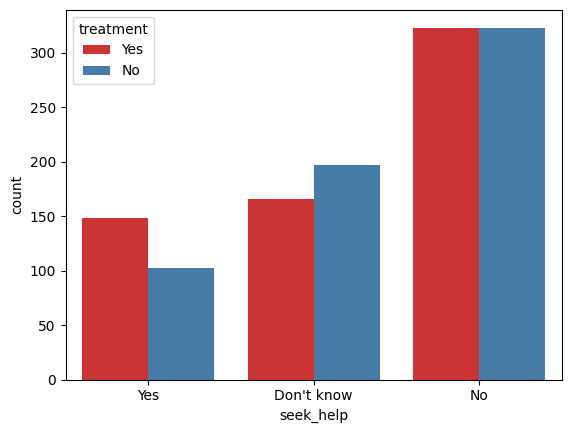

In [503]:
#relationship between seek_help and treatment
sns.countplot( x = 'seek_help', hue = 'treatment', data = df, palette = 'Set1')
plt.savefig('treatment_vs_seekhelp.png', dpi=500)

In [ ]:
#relationship between benefits and treatment
sns.countplot( x = 'benefits', hue = 'treatment', data = df, palette = 'Set1')
plt.savefig('treatment_vs_benefits.png', dpi=500)

As expected, those with benefits are twice as more likely to seek treatment. Even so, many without benefits have taken matters into their own hands and also sought treatment

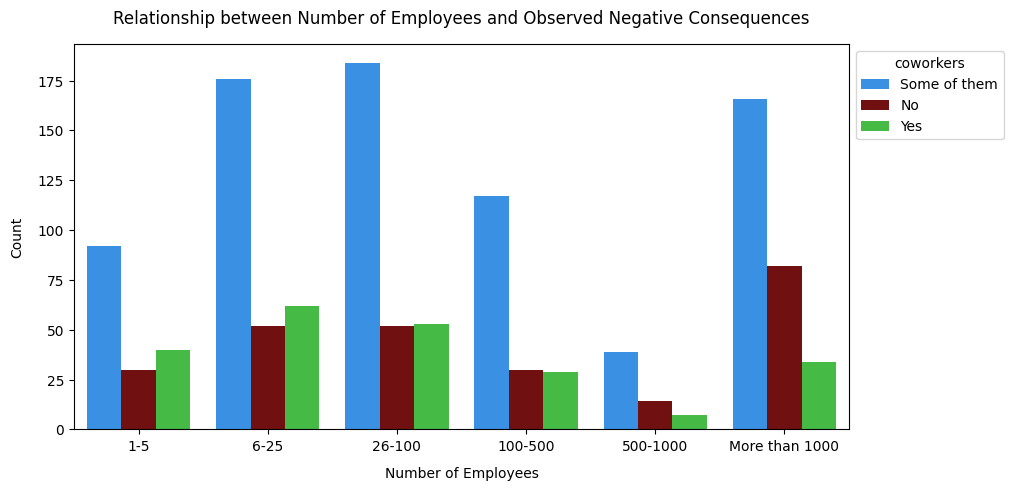

In [505]:

plt.figure(figsize=(10,5)) # Size of the figure
order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
ax = sns.countplot(x='no_employees', hue='coworkers',  data=df, order=order, palette=['dodgerblue', 'maroon', 'limegreen'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Number of Employees', labelpad=10)
plt.ylabel('Count', labelpad=10);
plt.title('Relationship between Number of Employees and Observed Negative Consequences', pad=15);
plt.savefig('relationship_no_employees_obsconsequence.png', dpi=500)

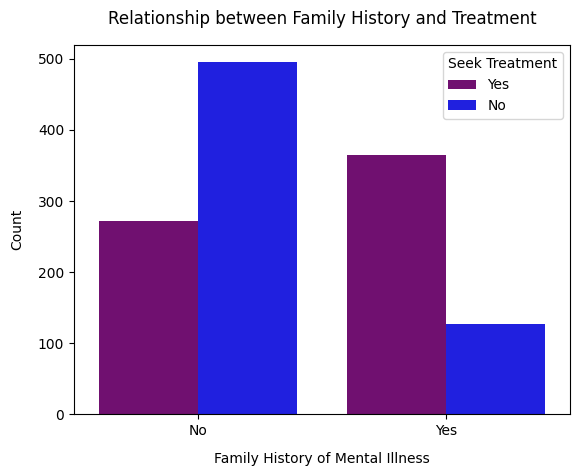

In [506]:
sns.countplot(x='family_history', data=df, hue='treatment', palette=['purple', 'blue'])
leg = plt.legend(loc='best', title='Seek Treatment')
leg._legend_box.align = "left"
plt.xlabel('Family History of Mental Illness', labelpad=10)
plt.ylabel('Count', labelpad=10)
plt.title('Relationship between Family History and Treatment', pad=15);
plt.savefig('relationship_family_treatment.png',dpi=500)

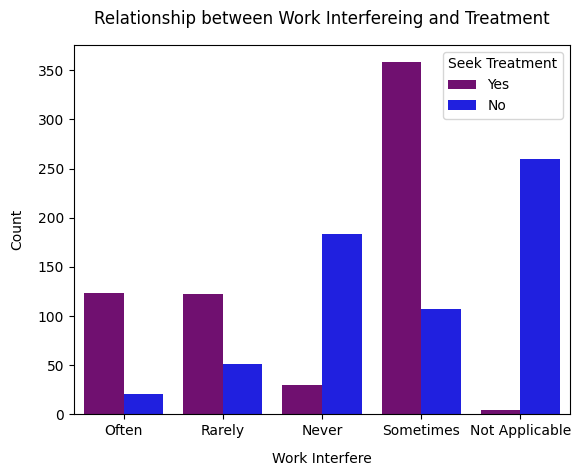

In [507]:
sns.countplot(x='work_interfere', data=df, hue='treatment', palette=['purple', 'blue'])
leg = plt.legend(loc='best', title='Seek Treatment')
leg._legend_box.align = "left"
plt.xlabel('Work Interfere', labelpad=10)
plt.ylabel('Count', labelpad=10)
plt.title('Relationship between Work Interfereing and Treatment', pad=15);
plt.savefig('work_interfere_treatment.png',dpi=500)

leave
Very easy             206
Somewhat easy         266
Somewhat difficult    126
Very difficult         98
Don't know            563
Name: count, dtype: int64


/var/folders/vv/7dp6x9hx2pj3bxcnxndv1fpw0000gn/T/ipykernel_15382/972734462.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




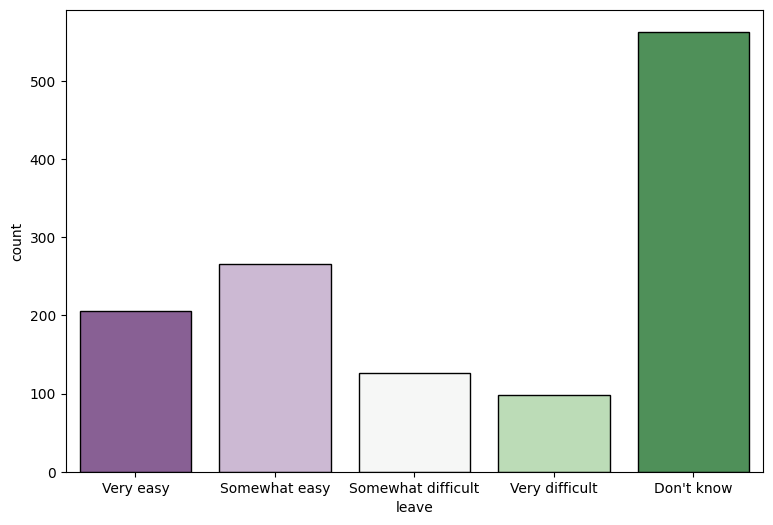

In [510]:
#How easy is it for you to take medical leave for a mental health condition?
right_order = ['Very easy', 'Somewhat easy', 'Somewhat difficult', 'Very difficult', "Don't know"]
print(df["leave"].value_counts().reindex(right_order))
plt.figure(figsize=(9,6))
sns.countplot(x="leave",data=df,edgecolor="black",palette='PRGn', order= right_order);
plt.savefig('leave_count.png', dpi = 500)


Age distribution and gender breakdown

In [ ]:
px.histogram(df, x = 'Age', color = 'Gender')
px.xticks()

In [ ]:
tech = df['tech_company'].value_counts()

tech.plot(kind='bar', color = 'rebeccapurple')
plt.title('Where Respondants Work')
plt.xticks(rotation=360) 
plt.xlabel('Tech Company?')
plt.ylabel('Number of People')
plt.show()

In [ ]:
remote = df['remote_work'].value_counts()
remote.plot(kind = 'bar', color = 'rebeccapurple')
plt.xticks(rotation=360) 
plt.title('Location of Work')
plt.xlabel('Remote Work?')
plt.ylabel('Number of People')
plt.xticks([0,1], ['In Person', 'Remote'])
plt.show()


In [ ]:

df['family_history'].value_counts().plot.barh()

plt.xticks(rotation=360) 
plt.title('Family History of Mental Illness')
plt.xlabel('Number of People')
plt.show()

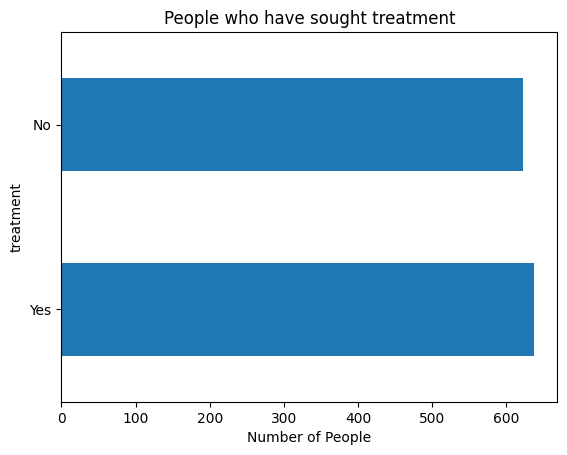

In [419]:

df['treatment'].value_counts().plot.barh()

plt.xticks(rotation=360) 
plt.title('People who have sought treatment')
plt.xlabel('Number of People')

plt.show()


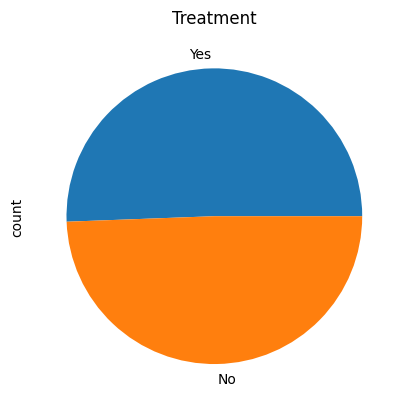

In [514]:
#Pie chart of people who have sought treatment

df['treatment'].value_counts().plot.pie()
plt.title('Treatment')
plt.savefig('piechart_target.png', dpi = 500)
plt.show()

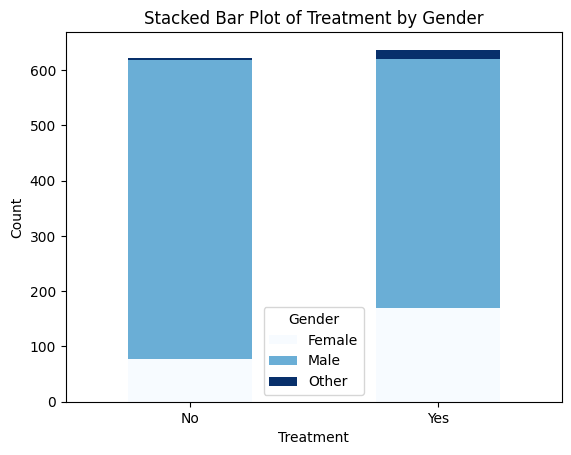

In [529]:
grouped_data = df.groupby(['treatment', 'Gender']).size().reset_index(name='count')

# Create a pivot table
pivot_table = grouped_data.pivot_table(index='treatment', columns='Gender', values='count', fill_value=0)

# Plot the stacked bar chart
pivot_table.plot.bar(stacked=True, colormap='Blues', title='Stacked Bar Plot of Treatment by Gender')

plt.xlabel('Treatment')
plt.xticks(rotation=360) 
plt.ylabel('Count')
plt.legend(title='Gender')
plt.savefig('gender_treatment_bar.png', dpi = 500)
plt.show()

In [ ]:
#XGBoost
import xgboost as xgb

param_grid_XGB = {

    'xgbclassifier__n_estimators': [50, 100, 150, 300, 500],
    'xgbclassifier__max_depth': [3, 5, 7, 30, 50]
}

model = xgb.XGBClassifier()
best_models, test_scores, results, optimal_hyperparams = MLpipe_KFold_Accuracy(X, y, preprocessor, model, param_grid_XGB) 



print('Mean of XGB accuracy: ', np.mean(test_scores))
print("Standard deviation of XGB accuracy:", np.std(test_scores))
print(optimal_hyperparams)
final_model, accuracy, cm = train_final_model(X, y, preprocessor, model, optimal_hyperparams)
print("Final XGB Test Accuracy:", accuracy)


KeyboardInterrupt: 

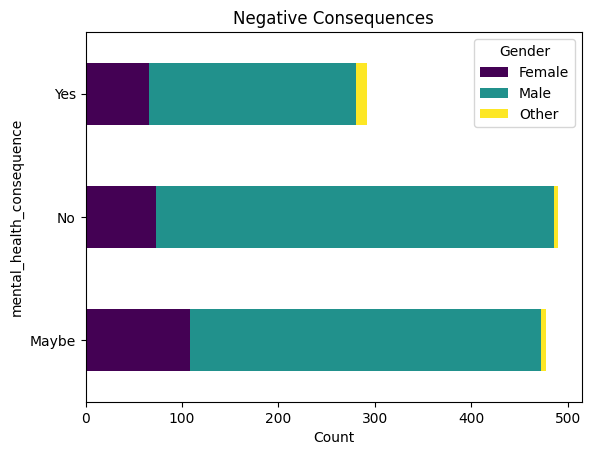

In [516]:
grouped_data = df.groupby(['mental_health_consequence', 'Gender']).size().reset_index(name='count')

# Create a pivot table
pivot_table = grouped_data.pivot_table(index='mental_health_consequence', columns='Gender', values='count', fill_value=0)

# Plot the stacked bar chart
pivot_table.plot.barh(stacked=True, colormap='viridis', title='Negative Consequences')
plt.xlabel('Count')
plt.ylabel('mental_health_consequence')
plt.legend(title='Gender')
plt.savefig('gender_consequence_bar.png', dpi = 500)

plt.show()

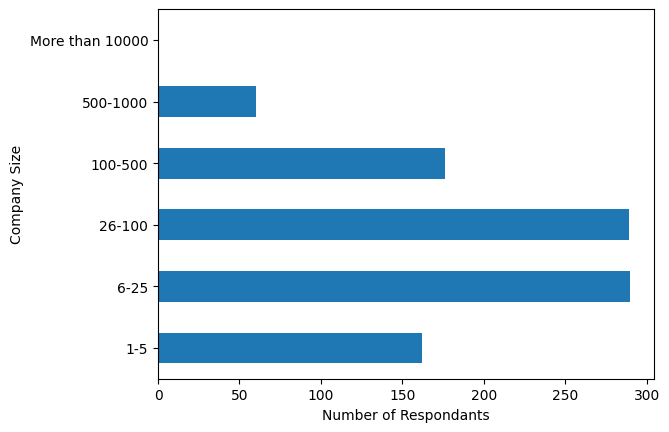

In [518]:
correct_order = ['1-5', '6-25', '26-100', '100-500','500-1000', 'More than 10000']
df['no_employees'].value_counts().reindex(correct_order).plot.barh()
plt.xticks(rotation=360) 
plt.xlabel('Number of Respondants')
plt.ylabel('Company Size')
plt.savefig('companysize_respondants.png', dpi = 500)
plt.show()

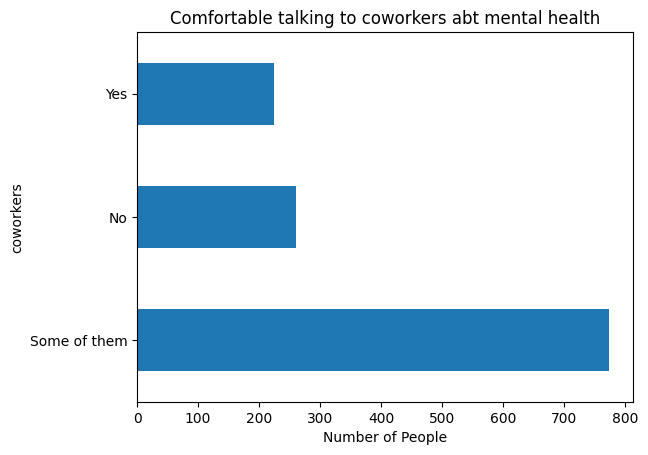

In [520]:
df['coworkers'].value_counts().plot.barh()

plt.xticks(rotation=360) 
plt.title('Comfortable talking to coworkers abt mental health')
plt.xlabel('Number of People')
plt.savefig('coworkers.png', dpi = 500)
plt.show()


# Select target variable (dependent variable)
y = df['mental_health_consequence']

Understand the mental health consequence variable with relation to the feature variables

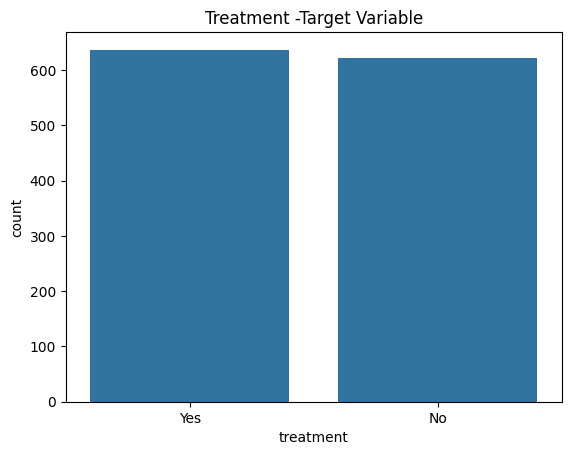

In [546]:
df['treatment'].value_counts()
sns.barplot(df['treatment'].value_counts())
plt.title("Treatment -Target Variable")
plt.savefig('treatment_count.png',dpi=500)

# Splitting data into X and y(target)

KFold Cross Validation to be safe, and a more robust model.
My model has 5 folds.

In [424]:
y = df['treatment'] 
X = df.loc[:, df.columns != 'treatment'] 

In [425]:
y = df['treatment'].map({'No': 0, 'Yes': 1})

# Preprocessing 

### Feature Collection

In [562]:
# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [561]:
# Collect the Features
target = 'treatment'
onehot_ftrs = ['Gender', 'Country', 'self_employed', 'family_history', 'remote_work', 
    'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help',
    'anonymity', 'mental_health_consequence', 'phys_health_consequence',
    'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
    'mental_vs_physical', 'obs_consequence']
ordinal_ftrs = ['work_interfere', 'no_employees', 'leave']
ordinal_cats = [['Never', 'Rarely', 'Sometimes', 'Often', 'Not Applicable'], #The not applicable category was added because it was not something I should impute if people don't have mental isseus
    ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'], 
    ['Very difficult', 'Somewhat difficult', 'Somewhat easy', 'Very easy', "Don't know"]]
minmax_ftrs = ['Age']

### Transformers

In [560]:

# Transformers
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # handle_unknown='ignore' avoids unseen categories error

ordinal_transformer = Pipeline(steps=[ 
    ('ordinal', OrdinalEncoder(categories=ordinal_cats))])  # Specify categories for ordinal encoding

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, minmax_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)
    ]
)

# ML Algos Training

In [559]:
def MLpipe_KFold_Accuracy(X, y, preprocessor, ML_algo, param_grid):
    # Lists to be returned
    test_scores = [] 
    best_models = [] 
    all_results = []
    best_hyperparameters = []
    nr_states=10

    for i in range(nr_states):

        # Initial split data for current random state (i) into other and holdout test
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        # K-Fold cross-validation setup with 5 splits for 4 train and 1 val
        kf = KFold(n_splits=5, shuffle=True, random_state=42 * i) #random state for reproducibility
        pipe = make_pipeline(preprocessor, ML_algo)
        
        # GridSearchCV for hyperparameter tuning
        grid = GridSearchCV(pipe, param_grid=param_grid, cv=kf, scoring='accuracy', return_train_score=True)
        grid.fit(X_other, y_other)

        results = pd.DataFrame(grid.cv_results_)
        results['random_state'] = i
        all_results.append(results)

        best_model = grid.best_estimator_
 
        best_params = grid.best_params_  
        best_hyperparameters.append({'Random State': i, 'Best Parameters': best_params})
        best_models.append(best_model)

        # Evaluate on holdout test set
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        test_scores.append(accuracy)

    # Combine all results into a single DataFrame
    final_results = pd.concat(all_results, ignore_index=True)

    # Find the most common hyperparameters across random states
    hyperparams_df = pd.DataFrame(best_hyperparameters)
    optimal_hyperparams = hyperparams_df['Best Parameters'].mode().iloc[0]

    # Return results
    return best_models, test_scores, final_results, optimal_hyperparams


Confusion matrix function
- Data is rerun and trained/ predicted to create the cm

In [457]:

def train_final_model(X, y, preprocessor, ML_algo, best_hyperparams):

    # Strip prefixes from hyperparameters (e.g., 'logisticregression__C' -> 'C')
    stripped_hyperparams = {
        key.split('__')[-1]: value for key, value in best_hyperparams.items()
    }

    # Split data for final evaluation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Update the model with optimal hyperparameters
    final_model = ML_algo.set_params(**stripped_hyperparams)

    # Create pipeline and train final model
    pipe = make_pipeline(preprocessor, final_model)
    pipe.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix ({ML_algo.__class__.__name__})')
    filename = f'Confusionmatrix_{ML_algo.__class__.__name__}.png'

    plt.savefig(filename)
    plt.show()

    return pipe, accuracy, cm

### ML Algorithm

Logitstic Regression

Mean of LR accuracy:  0.7103174603174602
Standard deviation of LR accuracy: 0.029536181057029216
{'logisticregression__C': 1.0, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}


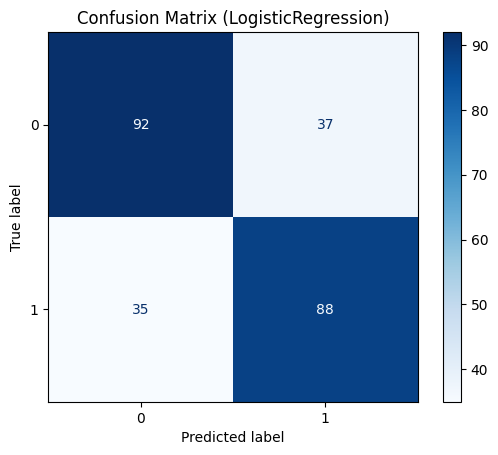

Final Logistic Regression Test Accuracy: 0.7142857142857143


In [563]:

#Logistic Regression
param_grid = {

        'logisticregression__C': [0.1, 1.0, 10.0, 50, 100],
        'logisticregression__penalty': ['l1'],
        'logisticregression__solver': ['liblinear']

}

model = LogisticRegression(max_iter=100000000)
best_models, test_scores, results, optimal_hyperparams = MLpipe_KFold_Accuracy(X, y, preprocessor, model, param_grid) 
print('Mean of LR accuracy: ', np.mean(test_scores))
print("Standard deviation of LR accuracy:", np.std(test_scores))
print(optimal_hyperparams)

final_model, accuracy, cm = train_final_model(X, y, preprocessor, model, optimal_hyperparams)
print("Final Logistic Regression Test Accuracy:", accuracy)

Random Forest Classifier

/Users/christineyao/Desktop/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Mean of RF accuracy:  0.823015873015873
Standard deviation of RF accuracy: 0.01538945986481373
{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.5}


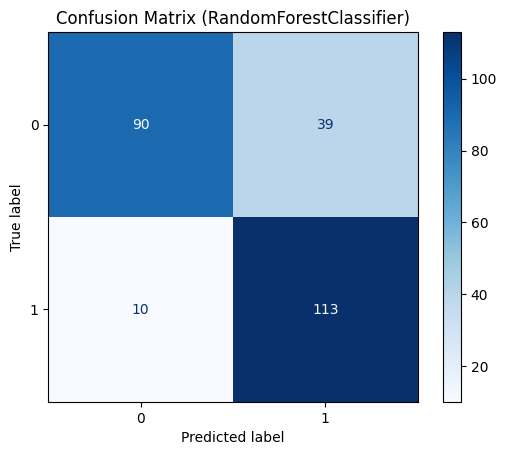

Final Random Forest Test Accuracy: 0.8055555555555556


In [592]:
#Random Forest Classifier
param_grid = {

    'randomforestclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    'randomforestclassifier__max_features': [0.25, 0.5, 0.75,1.0]

}

model = RandomForestClassifier()
best_models, test_scores, results, optimal_hyperparams = MLpipe_KFold_Accuracy(X, y, preprocessor, model, param_grid) 
print('Mean of RF accuracy: ', np.mean(test_scores))
print("Standard deviation of RF accuracy:", np.std(test_scores))
print(optimal_hyperparams)

final_model, accuracy, cm = train_final_model(X, y, preprocessor, model, optimal_hyperparams)
print("Final Random Forest Test Accuracy:", accuracy)

Support Vector Classification

Mean of SVM accuracy:  0.8182539682539682
Standard deviation of SVM accuracy: 0.021720527275244445
{'svc__C': 1.0, 'svc__gamma': 0.1}


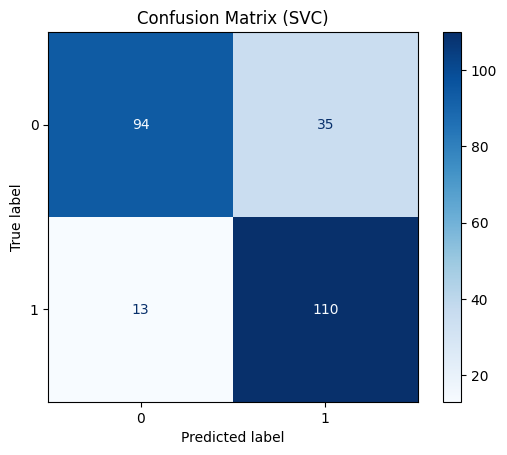

Final SVM Test Accuracy: 0.8095238095238095


In [445]:
from sklearn.svm import SVC
#SVR
param_grid_SVC = {

    'svc__gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
    'svc__C': [1e-2, 1e-1, 1e0, 1e1, 1e2]

}
model = SVC()
best_models, test_scores, results, optimal_hyperparams = MLpipe_KFold_Accuracy(X, y, preprocessor, model, param_grid_SVC) 
print('Mean of SVM accuracy: ', np.mean(test_scores))
print("Standard deviation of SVM accuracy:", np.std(test_scores))
print(optimal_hyperparams)
final_model, accuracy, cm = train_final_model(X, y, preprocessor, model, optimal_hyperparams)
print("Final SVM Test Accuracy:", accuracy)

KNearest Neighbors

/Users/christineyao/Desktop/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast

/Users/christineyao/Desktop/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast

/Users/christineyao/Desktop/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast

/Users/christineyao/Desktop/anaconda3/envs/data1030/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



Mean of KNN accuracy:  0.7753968253968253
Standard deviation of KNN accuracy: 0.022740553622054602
{'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 11, 'kneighborsclassifier__weights': 'distance'}


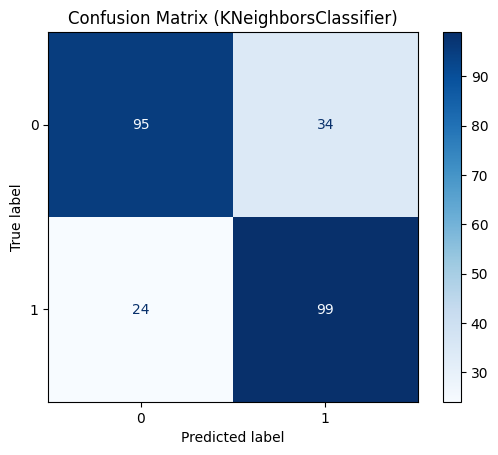

Final KNN Test Accuracy: 0.7698412698412699


In [446]:
#Knearest Neighbor 
param_grid_KNN = {

    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan']

}
model = KNeighborsClassifier()
best_models, test_scores, results, optimal_hyperparams = MLpipe_KFold_Accuracy(X, y, preprocessor,model, param_grid_KNN) 
print('Mean of KNN accuracy: ', np.mean(test_scores))
print("Standard deviation of KNN accuracy:", np.std(test_scores))

print(optimal_hyperparams)
final_model, accuracy, cm = train_final_model(X, y, preprocessor, model, optimal_hyperparams)
print("Final KNN Test Accuracy:", accuracy)

XGboost



In [586]:
#XGBoost
import xgboost as xgb

param_grid_XGB = {

    'xgbclassifier__n_estimators': [50, 100, 150, 300, 500],
    'xgbclassifier__max_depth': [3, 5, 7, 30, 50]
}

model = xgb.XGBClassifier()
best_models, test_scores, results, optimal_hyperparams = MLpipe_KFold_Accuracy(X, y, preprocessor, model, param_grid_XGB) 



print('Mean of XGB accuracy: ', np.mean(test_scores))
print("Standard deviation of XGB accuracy:", np.std(test_scores))
print(optimal_hyperparams)
final_model, accuracy, cm = train_final_model(X, y, preprocessor, model, optimal_hyperparams)
print("Final XGB Test Accuracy:", accuracy)


KeyboardInterrupt: 

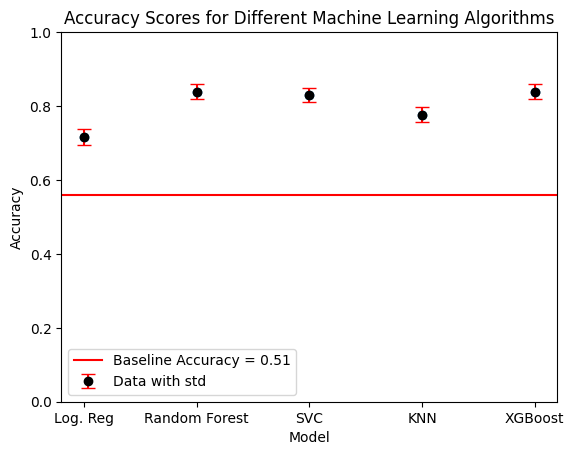

In [296]:
#Generate a plot to compare accuracy scores for different ML Models
import matplotlib.pyplot as plt
baseline = 0.558
models = ['Log. Reg', 'Random Forest', 'SVC', 'KNN', 'XGBoost']
means = [0.7160642570281125, 0.8389558232931726, 0.8297188755020081, 0.776706827309237, 0.8389558232931726]  # Replace with actual means
stds = [0.020949078483124457, 0.020434625274230612, 0.01977274477926294, 0.019854147942663904, 0.01971147179406912]        # Replace with actual std devs
plt.errorbar(models, means, yerr=stds, fmt='o', ecolor='red', color = 'black', capsize=5, label='Data with std')
plt.scatter(models, means)
plt.axhline(y=baseline, color='red', linestyle='-', label = 'Baseline Accuracy = 0.51')
plt.legend()
plt.title('Accuracy Scores for Different Machine Learning Algorithms')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1.2, step=0.2))
plt.xlabel('Model')
plt.savefig('accuracy_score_foreachmodel.png')
plt.show()

In [475]:
test_majority_class = y_test.mode()[0]
baseline_test_accuracy = (y_test == test_majority_class).mean()
print(f"True Baseline Accuracy (Test Set): {baseline_test_accuracy:.4f}")


True Baseline Accuracy (Test Set): 0.5119


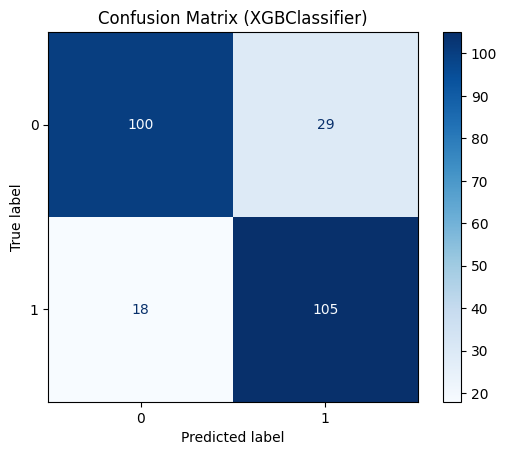

In [524]:
# Assuming `final_model` is trained with optimal hyperparameters
final_model, accuracy, cm = train_final_model(X, y, preprocessor, model, optimal_hyperparams)
